In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
import requests
np.seterr(invalid='ignore')

link = "https://covid.ourworldindata.org/data/ecdc/new_deaths.csv"
f = requests.get(link)

with open("deaths_new.csv","w+") as out:
    out.seek(0)
    out.write(f.text)
    out.truncate()

In [2]:
deaths=pd.read_csv("deaths_new.csv")

deaths_old=deaths.drop(deaths.index[260-7:])
average_period=7
total_deaths=deaths.cumsum(axis=0)
rolling_average=deaths.rolling(average_period).mean()

average_period=30

average_deaths=pd.read_csv("5YearDeaths.csv")
average_deaths.loc[:,'Total'] = average_deaths.sum(axis=1)
average_deaths['Rolling Average'] = average_deaths['Total'].rolling(average_period).mean()
average_deaths['Rolling ST Dev'] = average_deaths['Total'].rolling(average_period).std()
average_deaths['Rolling ST Dev 30 Before'] = average_deaths['Total'].rolling(average_period).std().shift(average_period)
average_deaths['Rolling ST Dev ratio']=average_deaths["Rolling ST Dev"]/average_deaths["Rolling ST Dev 30 Before"]


In [3]:
non_winter_average_deaths=1378
prop_of_covid_would_be_winter=.5
winter_mortality=average_deaths.drop(average_deaths.index[:122-30-30-23]).drop(average_deaths.index[122-30-30-23+51:])
winter_mortality["Excess"]=winter_mortality["Rolling Average"]-non_winter_average_deaths+114-1.366667+32-30
winter_mortality["Excess Adjusted"]=winter_mortality["Excess"].apply(lambda x : x -x*prop_of_covid_would_be_winter*total_deaths["United Kingdom"][260-7]/winter_mortality["Excess"].sum()) 
total_winter_mortality=winter_mortality.cumsum(axis=0)

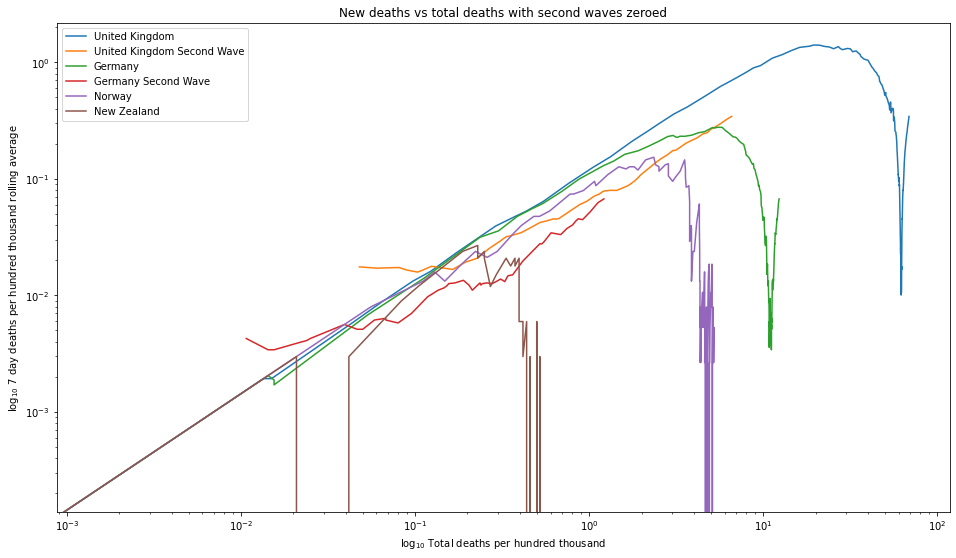

In [4]:
plt.rcParams["figure.figsize"] = (16,9)

plt.plot((np.divide(deaths["United Kingdom"].cumsum(axis=0).astype(str).astype(int).to_numpy(),668)),(np.divide(rolling_average["United Kingdom"].astype(str).astype(float).to_numpy(),668)))
plt.plot((np.divide(deaths["United Kingdom"].drop(deaths.index[:260-7]).cumsum(axis=0).astype(str).astype(int).to_numpy(),668)),(np.divide(rolling_average["United Kingdom"].drop(deaths.index[:260-7]).astype(str).astype(float).to_numpy(),668)))

plt.plot((np.divide(total_deaths["Germany"].astype(str).astype(int).to_numpy(),839)),(np.divide(rolling_average["Germany"].astype(str).astype(float).to_numpy(),839)))
plt.plot((np.divide(deaths["Germany"].drop(deaths.index[0:260-7]).cumsum(axis=0).astype(str).astype(int).to_numpy(),839)),(np.divide(rolling_average["Germany"].drop(deaths.index[0:260-7]).astype(str).astype(float).to_numpy(),839)))

plt.plot((np.divide(total_deaths["Norway"].astype(str).astype(int).to_numpy(),54)),(np.divide(rolling_average["Norway"].astype(str).astype(float).to_numpy(),54)))
plt.plot((np.divide(total_deaths["New Zealand"].astype(str).astype(float).to_numpy(),48)),(np.divide(rolling_average["New Zealand"].astype(str).astype(float).to_numpy(),48)))


china_dip=110


plt.xscale('log')
plt.yscale('log')
plt.xlabel("$\log_{10}$ Total deaths per hundred thousand")
plt.ylabel("$\log_{10}$ 7 day deaths per hundred thousand rolling average")
plt.title("New deaths vs total deaths with second waves zeroed")

plt.legend(["United Kingdom","United Kingdom Second Wave","Germany","Germany Second Wave","Norway","New Zealand","UK Lockdown Start","UK Tier System Introduction"])

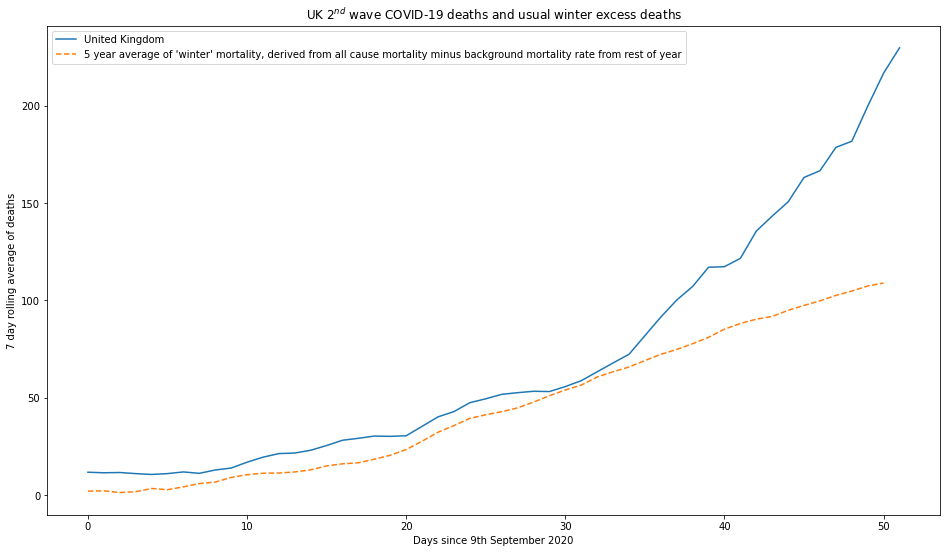

In [5]:
plt.rcParams["figure.figsize"] = (16,9)

plt.plot((np.divide(rolling_average["United Kingdom"].drop(deaths.index[0:260-7]).astype(str).astype(float).to_numpy(),1)))

china_dip=110

plt.plot((np.divide(winter_mortality["Excess"].astype(str).astype(float).to_numpy(),1)),linestyle = '--')

plt.xlabel("Days since 9th September 2020")
plt.ylabel("7 day rolling average of deaths")
plt.title("UK $2^{nd}$ wave COVID-19 deaths and usual winter excess deaths")

plt.legend(["United Kingdom","5 year average of 'winter' mortality, derived from all cause mortality minus background mortality rate from rest of year","UK Lockdown Start","UK Tier System Introduction","UK Average Winter Excess Mortality for this period"])#,"Italy","Italy Second Wave","France","France Second Wave"])"""

Text(0.5, 1.0, 'UK COVID deaths')

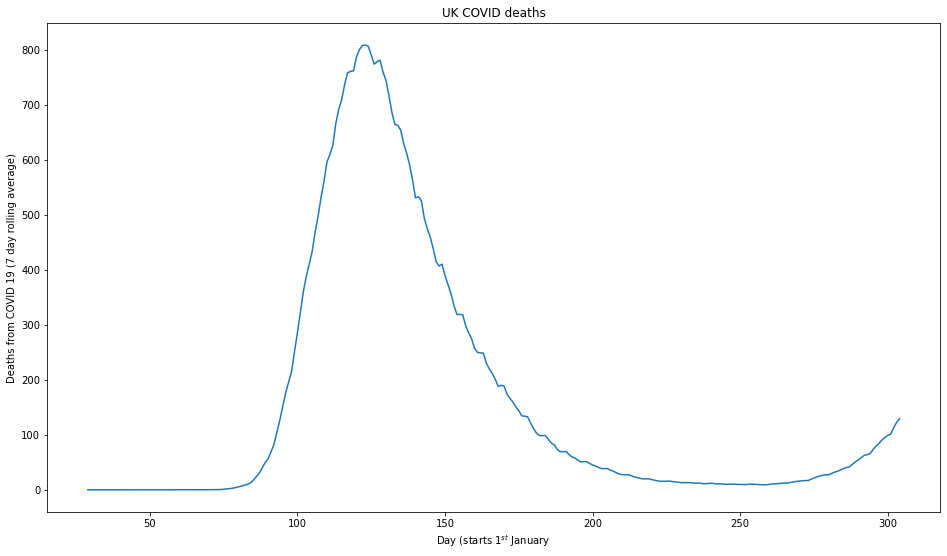

In [6]:
plt.plot(deaths["United Kingdom"].rolling(average_period).mean())
plt.ylabel("Deaths from COVID 19 (7 day rolling average)")
plt.xlabel("Day (starts $1^{st}$ January")
plt.title("UK COVID deaths")

Text(0.5, 1.0, 'UK COVID deaths with a log scaled y axis')

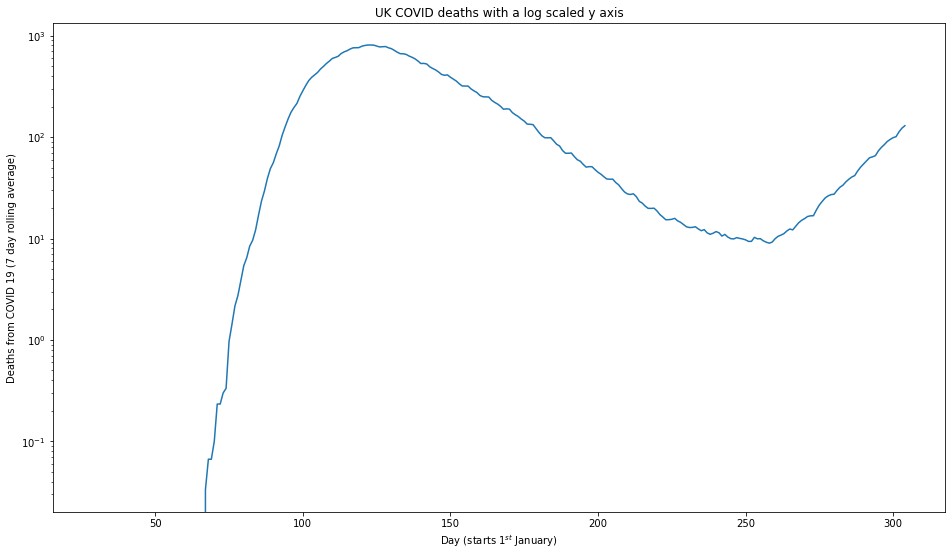

In [7]:
plt.plot(deaths["United Kingdom"].rolling(average_period).mean())
plt.yscale('log')
plt.ylabel("Deaths from COVID 19 (7 day rolling average)")
plt.xlabel("Day (starts $1^{st}$ January)")
plt.title("UK COVID deaths with a log scaled y axis")